In [1]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime

In [44]:
def DisplayGraphWithInfos(array, infos, title, axs, axy, axn, fig):
    x_lims = list()
    x_lims.append(infos[0]+datetime.timedelta(hours=7))
    x_lims.append(x_lims[0]+datetime.timedelta(days=infos[5]))
    x_lims = mdates.date2num(x_lims)
    axs[axy][axn].xaxis_date()
    axs[axy][axn].imshow(array, origin='lower', cmap=plt.get_cmap('jet') , aspect='auto',extent=[x_lims[0],x_lims[1],infos[2],infos[1]])
    x_lims = mdates.DateFormatter("%H:%M")
    axs[axy][axn].xaxis.set_major_formatter(x_lims)
    axs[axy][axn].set_title("{} -- {}/{}/{}".format(title, infos[0].year, infos[0].month, infos[0].day))
    axs[axy][axn].set_xlabel("Time")
    axs[axy][axn].set_ylabel("Latitude")
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'), norm=plt.Normalize(vmin=infos[4], vmax=infos[3]))
    sm._A = []
    clb=fig.colorbar(sm, ax=axs[axy][axn])
    clb.set_label("nT")

/home/pl/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


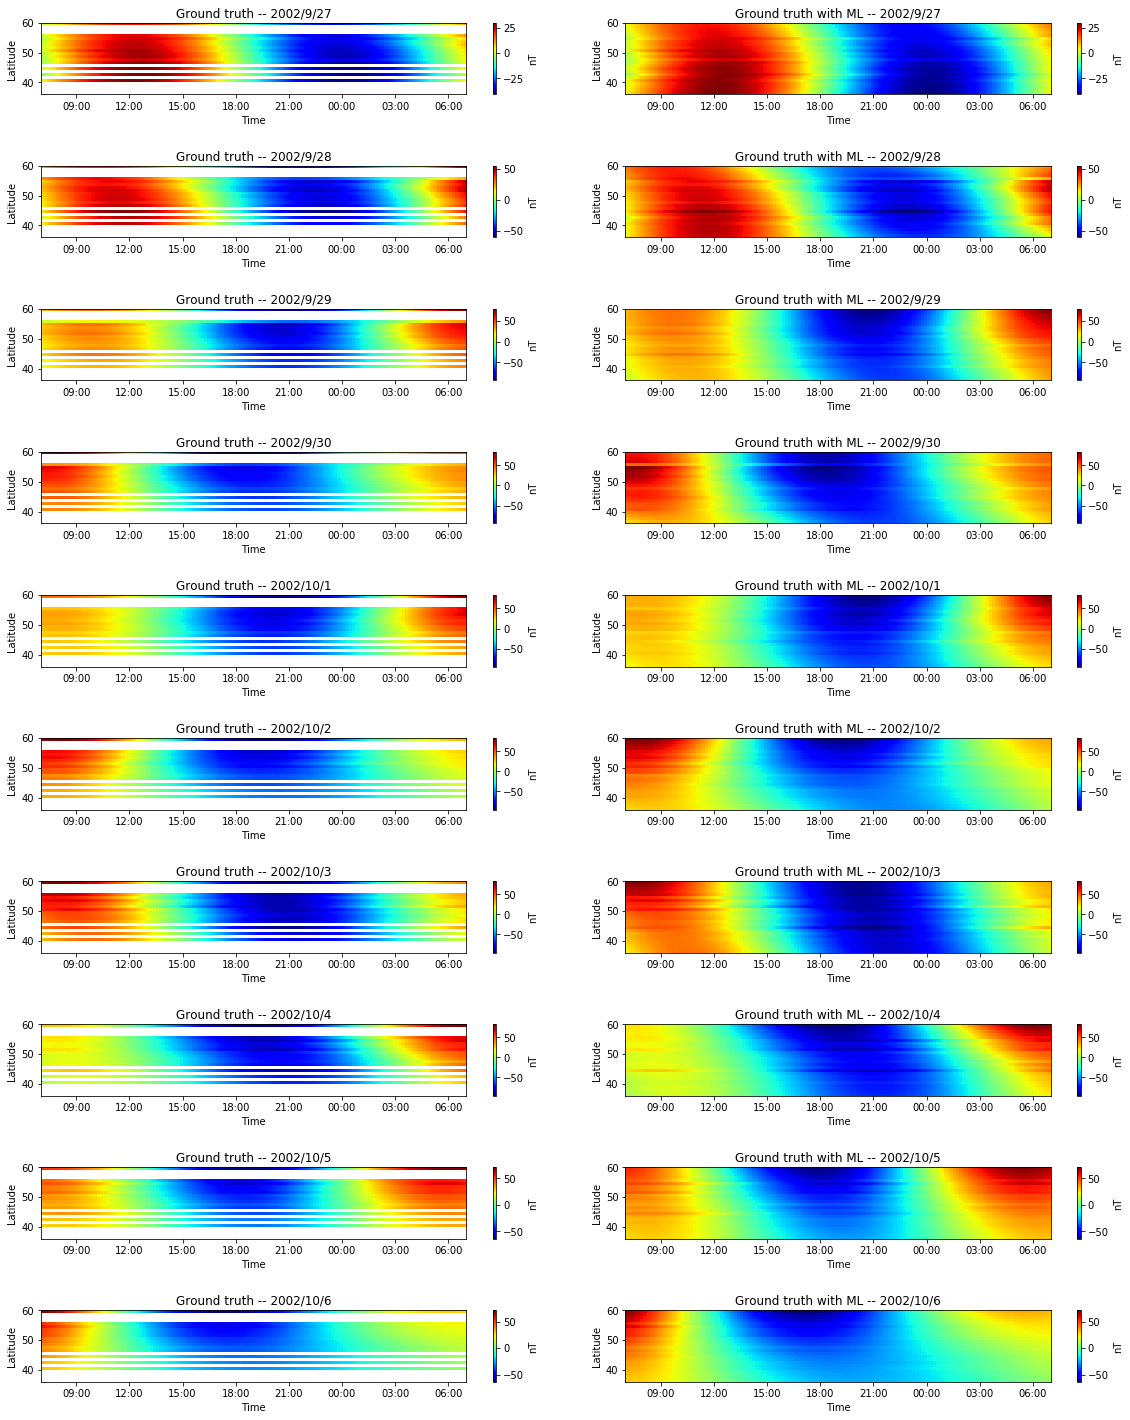

In [45]:
epoch = 1000
path = "../TrainingDataset/x_train/"
numberOfPlots = 10
fig, axs = plt.subplots(numberOfPlots,2, figsize=(25, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1., wspace=.1)

axs = axs.ravel().reshape(numberOfPlots,2)
fig.set_size_inches(20,25)

for y in range(numberOfPlots):
    complete = np.load('{}Y2_36_60_{}.npy'.format(path, epoch+y))
    base = np.load('{}Y2_36_60_{}_base.npy'.format(path, epoch+y))
    infos = np.load('{}Y2_36_60_{}_infos.npy'.format(path, epoch+y), allow_pickle=True, encoding="latin1")

    DisplayGraphWithInfos(base, infos, "Ground truth", axs, y, 0, fig)
    DisplayGraphWithInfos(complete, infos, "Ground truth with ML", axs, y, 1, fig)
fig.show()
fig.savefig("DisplayDataset.png")